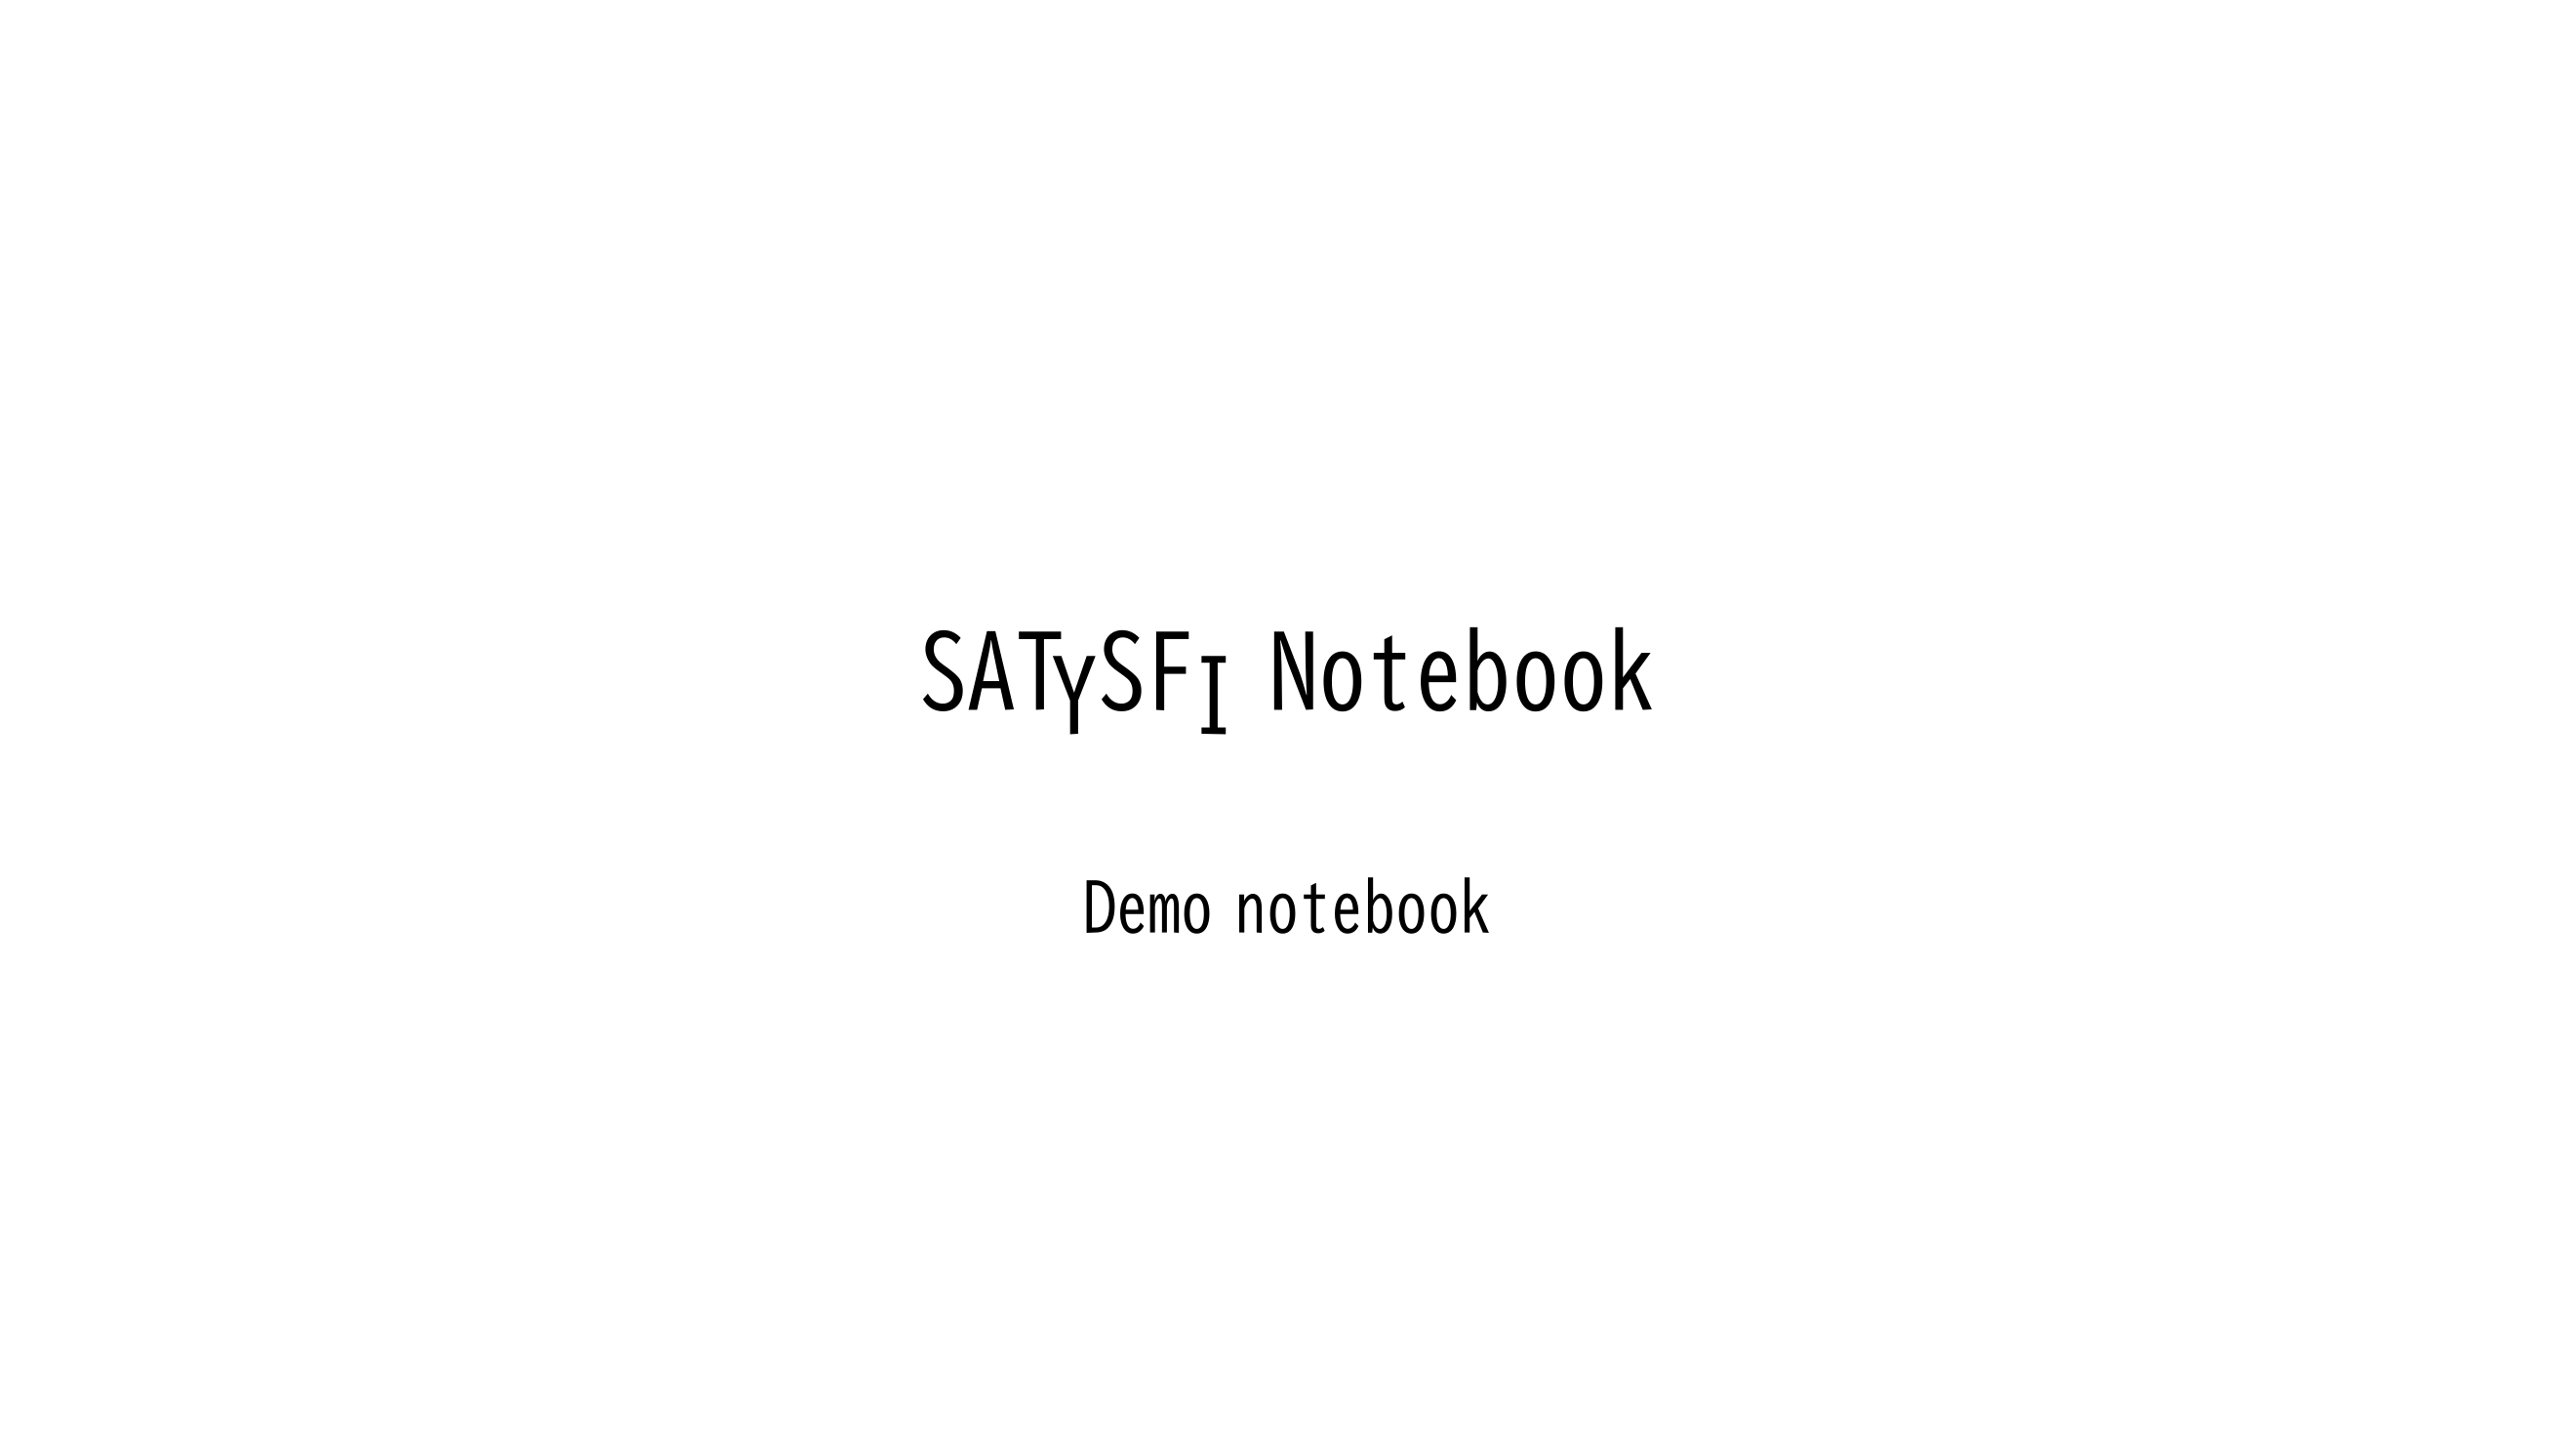

In [1]:
+make-title (|
  title = {| \SATySFi; Notebook |},
  author = {| Demo notebook |},
|);

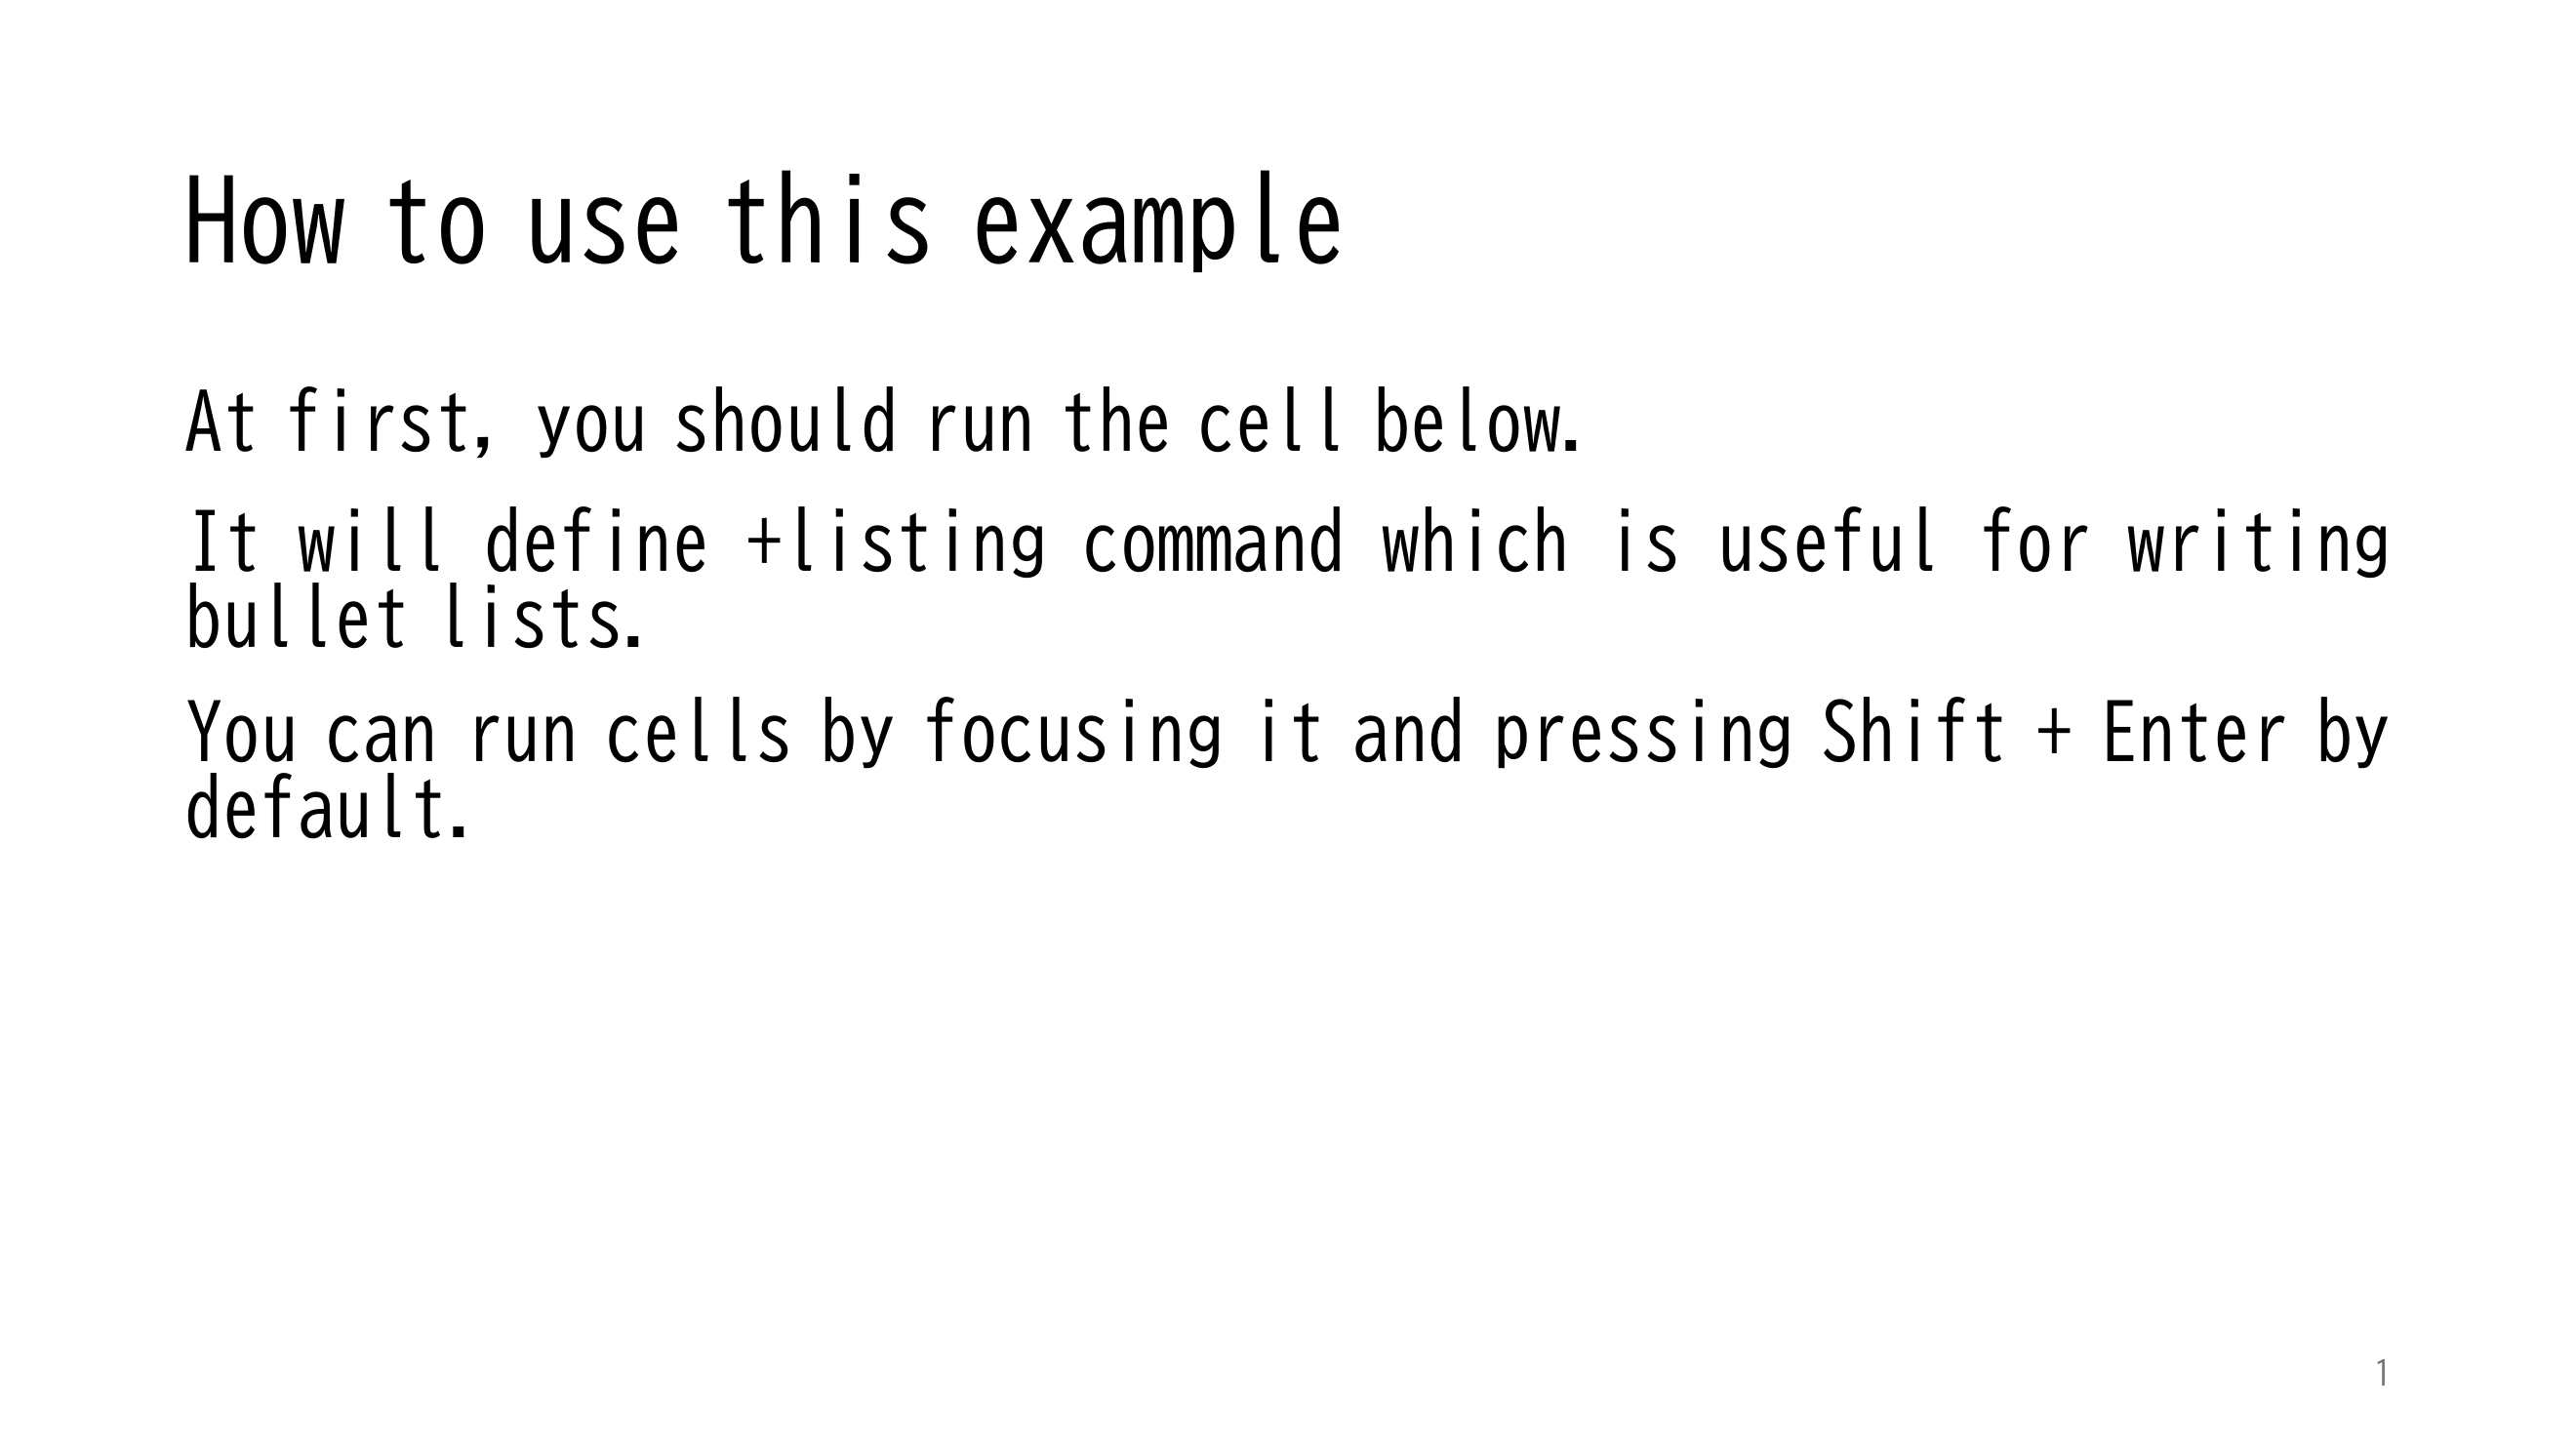

In [2]:
+frame { How to use this example } <
  +p {
    At first, you should run the cell below.
  }

  +p {
    It will define `+listing` command which is useful for writing bullet lists.
  }

  +p {
    You can run cells by focusing it and pressing Shift + Enter by default.
  }
>

In [3]:
%! val block ctx +listing (Item(_, children)) =
  let rec render-item ctx depth (Item(it, children)) =
    let ctx-cur =
      let size = get-font-size ctx in
      ctx |> set-font-size (size -' 4pt *' (float depth))
    in
    let indent = 32pt *' (float depth) in
    let ib-bullet =
      let ctx = ctx-cur |> PPD.Font.bold in
      read-inline ctx { ・ }
    in
    let width-bullet = get-natural-width ib-bullet in
    let ib-parent =
      let fn ctx =
        form-paragraph ctx (read-inline ctx it ++ inline-fil)
      in
      embed-block-top ctx-cur ((get-text-width ctx-cur) -' indent -' width-bullet) fn
    in
    let bb-parent =
      form-paragraph ctx-cur (inline-skip indent ++ ib-bullet ++ ib-parent)
    in
    let add-child acc child =
      acc +++ render-item ctx (depth + 1) child
    in
    List.fold-left add-child bb-parent children
  in
  let fn acc cur =
    acc +++ render-item ctx 0 cur
  in
  List.fold-left fn block-nil children

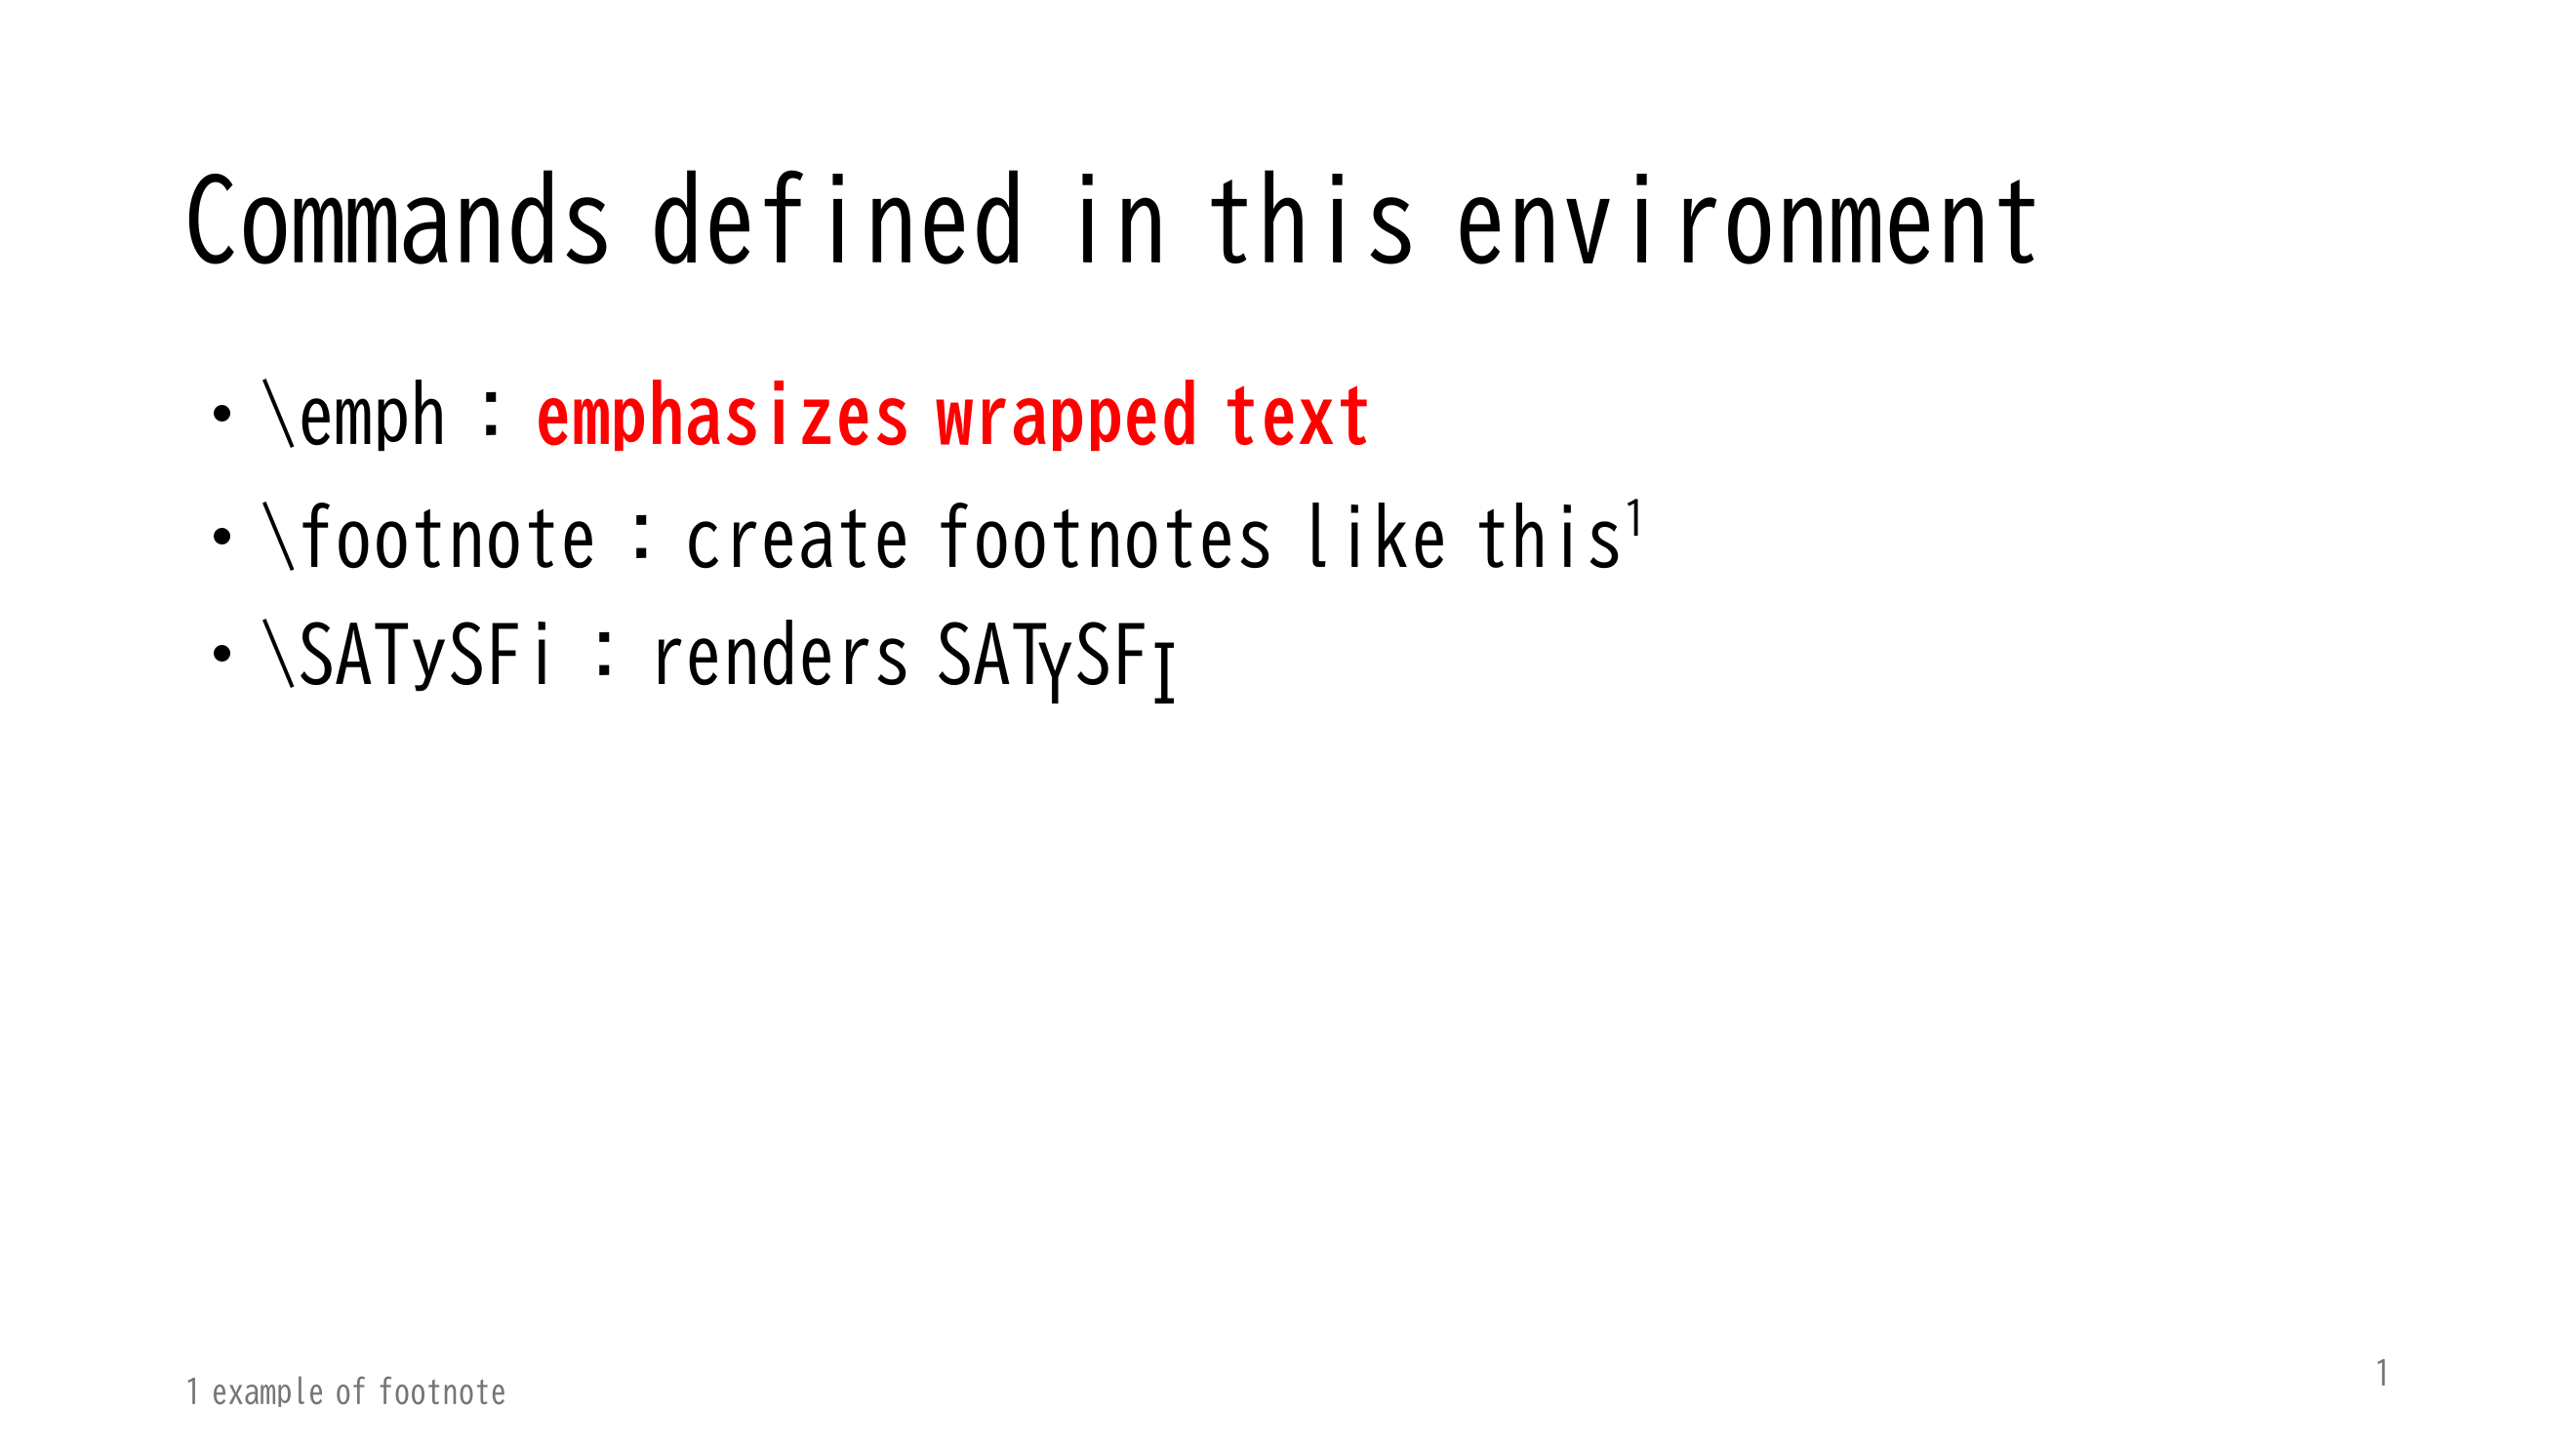

In [4]:
+frame { Commands defined in this environment } <
  +listing {
    * `\emph` : \emph{ emphasizes wrapped text }
    * `\footnote` : create footnotes \footnote{ like this }{ example of footnote }
    * `\SATySFi` : renders \SATySFi;
  }
>

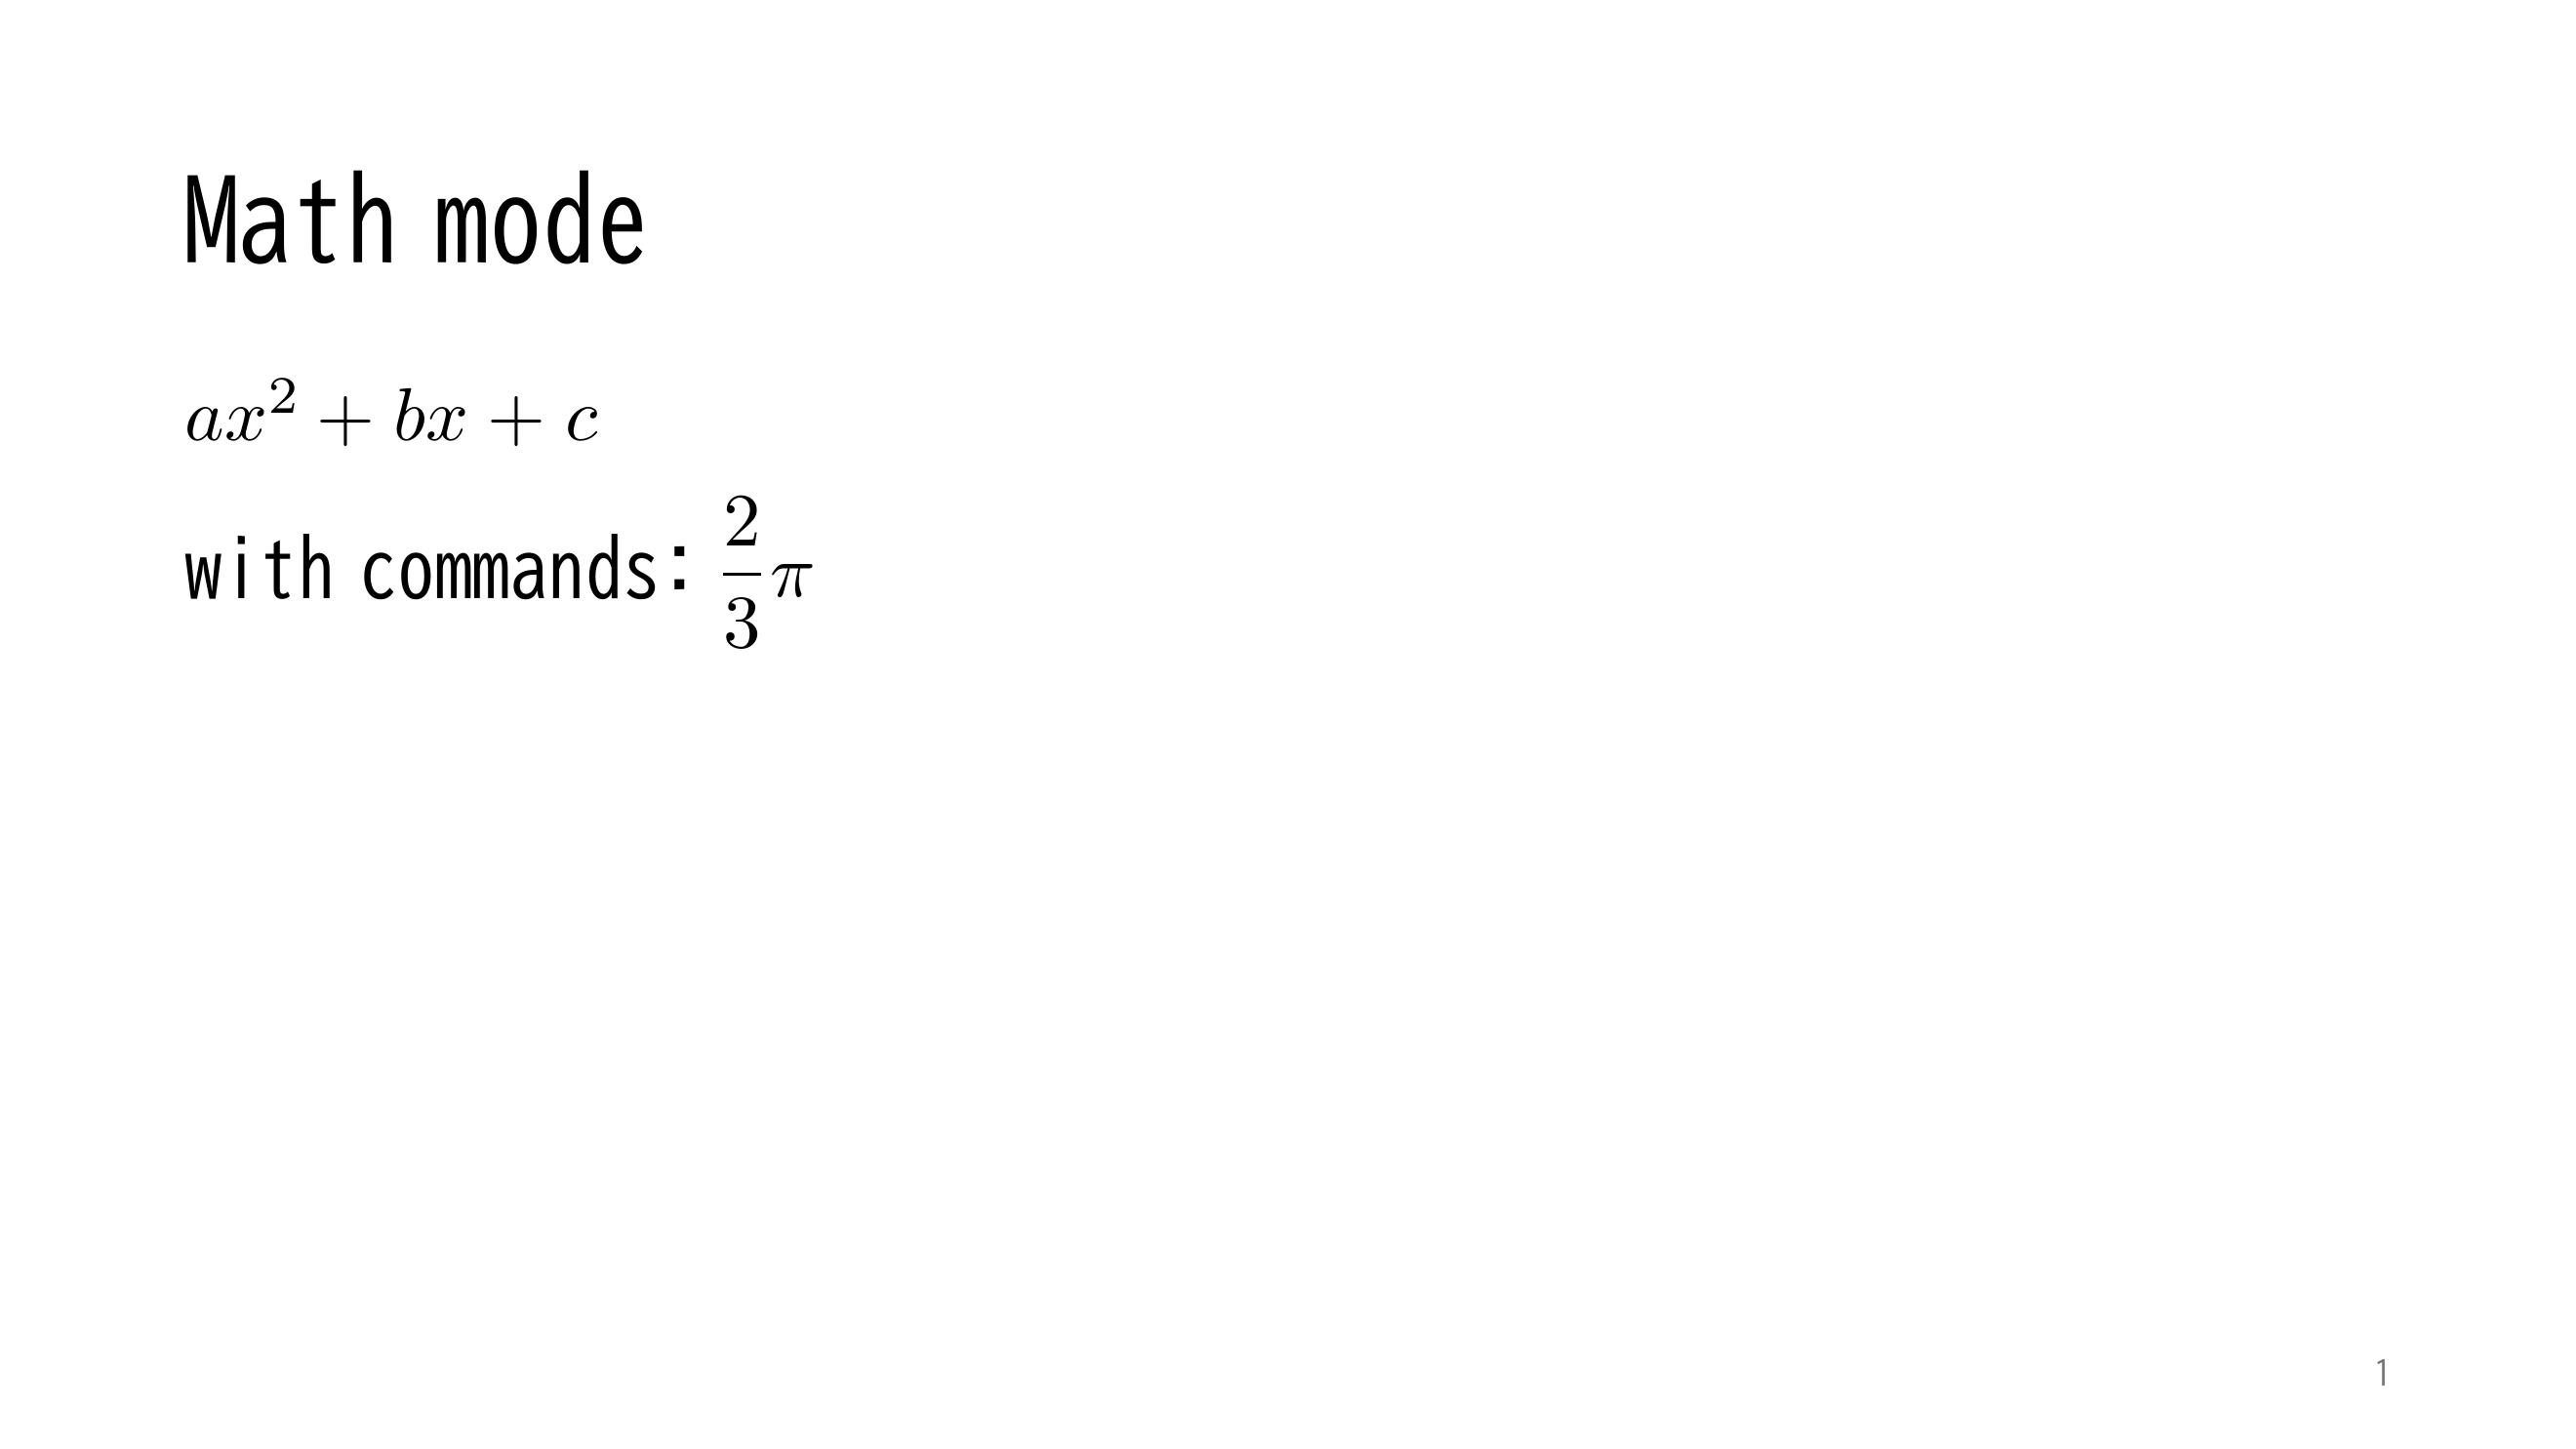

In [5]:
+frame { Math mode } <
  +p {
    ${ a x^2 + b x + c }
  }

  +p {
    with commands: ${ \frac{2}{3} \pi }
  }
>